In [3]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# load dataset
df = pd.read_csv("../data/heart.csv")

In [78]:
target_var = "HeartDisease"
numeric_cols_all = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
categoric_cols_all = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

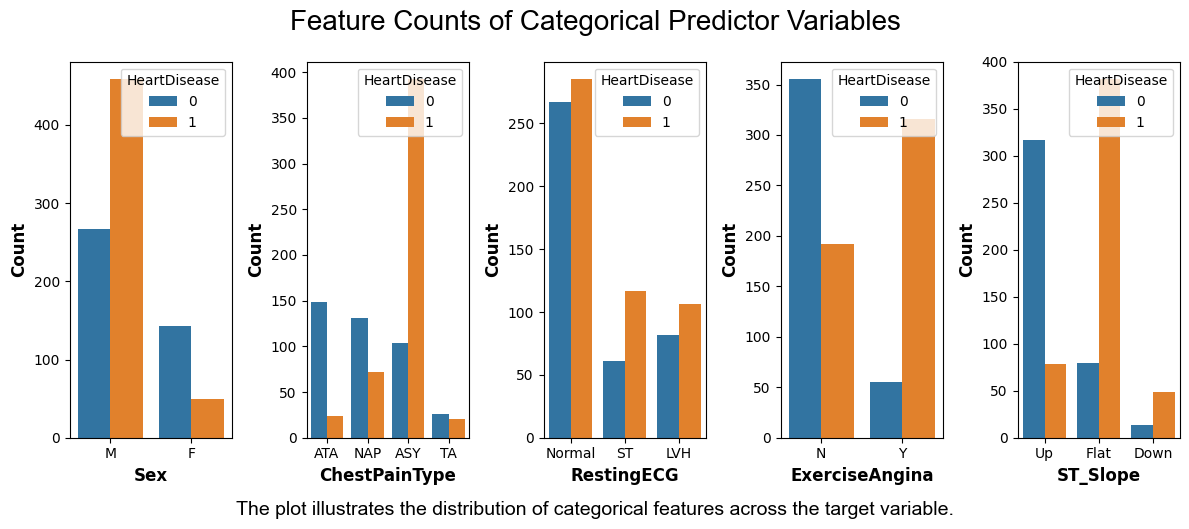

In [83]:
# Counting feature values across target variable
cat_predictor_vars = categoric_cols_all
fh, axs = plt.subplots(ncols=5,figsize=(12, 5))

for i in np.arange(5):
    sns.countplot(data=df,hue = target_var,x=cat_predictor_vars[i],ax= axs[i])
    axs[i].set_xlabel(cat_predictor_vars[i],fontsize=12,fontweight='bold')
    axs[i].set_ylabel("Count",fontsize=12,fontweight="bold")
fh.suptitle("Feature Counts of Categorical Predictor Variables",fontsize=20,font="Arial")
# fh.subplots_adjust(bottom=0.3)

# Define the caption text
caption_text = "The plot illustrates the distribution of categorical features across the target variable."
# Add the caption using plt.figtext()
# The coordinates (0.5, 0.01) place the text near the bottom-center of the figure.
# horizontalalignment='center' centers the text horizontally.
# wrap=True ensures the text wraps within the figure boundaries.
plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=14,font="Arial")
plt.tight_layout()
fh.savefig("../figures/feature_counts_categorical_predictors_anup_pillai.png",bbox_inches="tight")

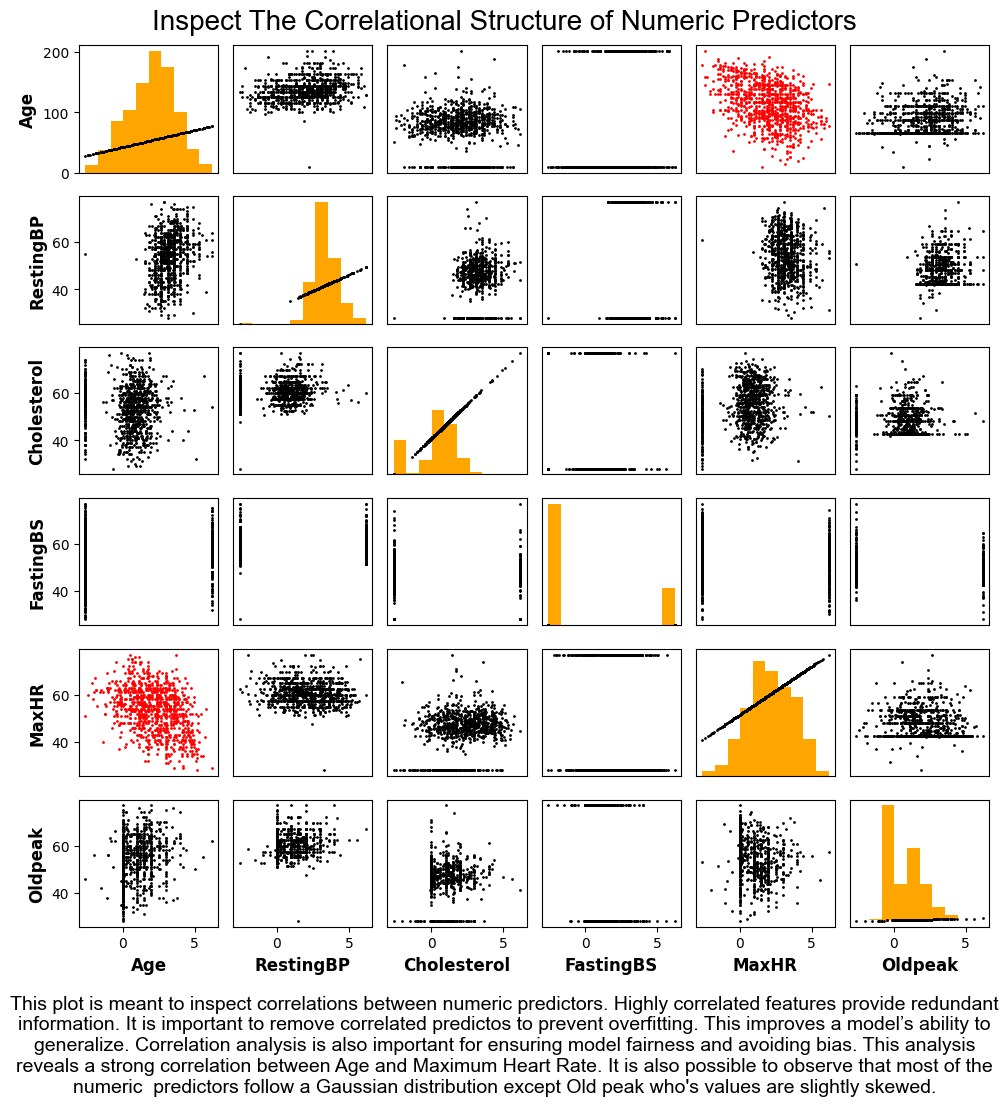

In [112]:
# Inspect correlations between numeric predictors
correlated_predictors = [("Age","MaxHR"),("MaxHR","Age")]
# plt.close('All')
fh, axs = plt.subplots(nrows=6,ncols=6,figsize=(10, 10))
for i in np.arange(6):
    for j in np.arange(6):
        marker_color = "black"
        if ((numeric_cols_all[i],numeric_cols_all[j]) in correlated_predictors):
            marker_color = "red"
        if (i == j):
            axs[i,j].hist(df[numeric_cols_all[i]].values,density=False,color='orange')
        axs[i,j].plot(df[numeric_cols_all[i]].values,df[numeric_cols_all[j]],linewidth=0,marker='o',markersize=1,color=marker_color)
        axs[i,j].axes.get_xaxis().set_visible(False)
        axs[i,j].axes.get_yaxis().set_visible(False)
        if(i==5):
            axs[i,j].axes.get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(numeric_cols_all[j],fontsize=12,fontweight="bold")
        if(j==0):
            axs[i,j].axes.get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(numeric_cols_all[i],fontsize=12,fontweight="bold")
fh.suptitle("Inspect The Correlational Structure of Numeric Predictors",fontsize=20,font="Arial")
# Define the caption text
caption_text = "This plot is meant to inspect correlations between numeric predictors. \
Highly correlated features provide redundant information. It is important to remove correlated predictos to prevent overfitting. \
This improves a model’s ability to generalize. Correlation analysis is also important for ensuring model fairness and avoiding bias. \
This analysis reveals a strong correlation between Age and Maximum Heart Rate. It is also possible to observe that most of the numeric  \
predictors follow a Gaussian distribution except Old peak who's values are slightly skewed."
# Add the caption using plt.figtext()
# The coordinates (0.5, 0.01) place the text near the bottom-center of the figure.
# horizontalalignment='center' centers the text horizontally.
# wrap=True ensures the text wraps within the figure boundaries.
plt.figtext(0.5, -0.1, caption_text, wrap=True, horizontalalignment='center', fontsize=14,font="Arial")
plt.tight_layout()
fh.savefig("../figures/inspect_correlations_between_numeric_predictors_anup_pillai.png",bbox_inches="tight")